In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
def convert_to_alphaXY(theta,phi):
    A = np.sqrt(1+np.tan(phi)**2)
    if math.pi/2 < phi <= 3*math.pi/2:
        ZX = - np.arctan(np.tan(theta)/A)
        ZY = - np.arctan(np.tan(theta)*np.tan(phi)/A)
    else:
        ZX = np.arctan(np.tan(theta)/A)
        ZY = np.arctan(np.tan(theta)*np.tan(phi)/A)
    return(ZX,ZY)

def calculate_impact_to_object(dist_to_object,bursts,PosXX,PosYY,Theta,Phi):
    AngXX,AngYY = convert_to_alphaXY(Theta,Phi)
    #calculate intermediate point
    a = PosXX - dist_to_object * np.tan(AngXX)
    b = PosYY - dist_to_object * np.tan(AngYY)
    #shape condition, in this case, a circle centered in (10,10) with radius 5.
    centreX = 5
    centreY = 10
    if 100 > ((a - centreX)**2 + (b - centreY)**2) and math.floor(np.arctan((b-centreY)/(a-centreX))*bursts/math.pi)%2 == True:
        impact = True
    else:
        impact = False
    '''
    if 5 < a < 15 and 5 < b < 15:
        impact = True
    else:
        impact = False
    '''
    #return the result
    return impact


Starting folder 0
Iteration 0 Number of points: 930458 Positive: 930458 Negative 69542
Iteration 1 Number of points: 1860993 Positive: 930535 Negative 69465
Iteration 2 Number of points: 2791218 Positive: 930225 Negative 69775
Iteration 3 Number of points: 3721646 Positive: 930428 Negative 69572
Iteration 4 Number of points: 4652085 Positive: 930439 Negative 69561
Iteration 5 Number of points: 5581891 Positive: 929806 Negative 70194
Iteration 6 Number of points: 6511926 Positive: 930035 Negative 69965
Iteration 7 Number of points: 7442056 Positive: 930130 Negative 69870
Iteration 8 Number of points: 8371957 Positive: 929901 Negative 70099
Iteration 9 Number of points: 9301853 Positive: 929896 Negative 70104
Iteration 10 Number of points: 10231794 Positive: 929941 Negative 70059
Iteration 11 Number of points: 11161896 Positive: 930102 Negative 69898
Iteration 12 Number of points: 12091894 Positive: 929998 Negative 70002
Iteration 13 Number of points: 13022151 Positive: 930257 Negative 6

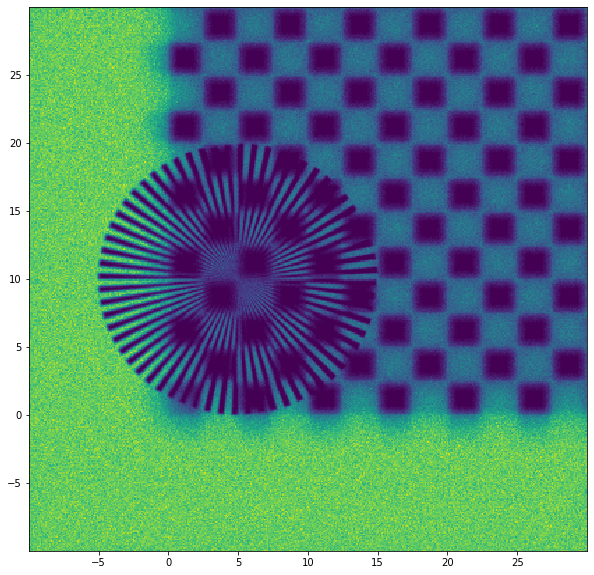

Starting folder 1
Iteration 0 Number of points: 930458 Positive: 930458 Negative 69542
Iteration 1 Number of points: 1860993 Positive: 930535 Negative 69465
Iteration 2 Number of points: 2791218 Positive: 930225 Negative 69775
Iteration 3 Number of points: 3721646 Positive: 930428 Negative 69572
Iteration 4 Number of points: 4652085 Positive: 930439 Negative 69561
Iteration 5 Number of points: 5581891 Positive: 929806 Negative 70194
Iteration 6 Number of points: 6511926 Positive: 930035 Negative 69965
Iteration 7 Number of points: 7442056 Positive: 930130 Negative 69870
Iteration 8 Number of points: 8371957 Positive: 929901 Negative 70099
Iteration 9 Number of points: 9301853 Positive: 929896 Negative 70104
Iteration 10 Number of points: 10231794 Positive: 929941 Negative 70059
Iteration 11 Number of points: 11161896 Positive: 930102 Negative 69898
Iteration 12 Number of points: 12091894 Positive: 929998 Negative 70002
Iteration 13 Number of points: 13022151 Positive: 930257 Negative 6

In [ ]:
histtotal = np.zeros([400,400])
for i in range(10): 
    finalposition = []
    number_of_files = int(len(os.listdir("Pavia"+str(i))[1:])/3)
    print("Starting folder "+str(i))
    for elem in range(number_of_files):
        countpos,countneg = 0,0
        titleTheta = "Pavia00/Testrun-of-full-sim-AngleTheta-index"+str(elem)+".txt"
        with open(titleTheta, 'r') as file:
            AnTheta = np.array(eval(file.read())) # read list string and convert to array
        file.close()

        titlePhi = "Pavia00/Testrun-of-full-sim-AnglePhi-index"+str(elem)+".txt"
        with open(titlePhi, 'r') as file:
            AnPhi = np.array(eval(file.read())) # read list string and convert to array
        file.close()

        titlePos =  "Pavia00/Testrun-of-full-sim-positionXY-index"+str(elem)+".txt"
        with open(titlePos, 'r') as file:
            Position = np.array(eval(file.read())) # read list string and convert to array
        file.close()

        for i in range(len(AnPhi)):
            impact = calculate_impact_to_object(10,64,Position[i,0],Position[i,1],AnTheta[i],AnPhi[i])
            if impact == False:
                finalposition.append(Position[i,:])
                countpos +=1
            else: 
                countneg +=1
        print("Iteration "+str(elem)+" Number of points: "+str(len(finalposition))+" Positive: "+str(countpos)+" Negative "+str(countneg))
    PosXX_after = np.zeros(len(finalposition))
    PosYY_after = np.zeros(len(finalposition))

    for i in range(len(finalposition)):
        PosXX_after[i] = finalposition[i][0]
        PosYY_after[i] = finalposition[i][1]
        
    plt.figure(figsize=(10,10))
    #hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400,range=[[-5, 15], [0, 20]],cmap="hot")
    hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400)
    plt.show()
    plt.close()
    for i in range(len(hist)):
        for j in range(len(hist)):
            histtotal[i][j] += hist[i][j]
    

In [ ]:
PosXX_after = np.zeros(len(finalposition))
PosYY_after = np.zeros(len(finalposition))

for i in range(len(finalposition)):
    PosXX_after[i] = finalposition[i][0]
    PosYY_after[i] = finalposition[i][1]

In [ ]:
plt.figure(figsize=(10,10))
#hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400,range=[[-5, 15], [0, 20]],cmap="hot")
hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400)
plt.show()
plt.close()

Inner
[ 64.  87. 111. 106. 110. 114.  99. 113.  91. 107.  87.  98. 104. 127.
  94.  94. 108. 109. 113. 131.]
Outer
[275. 274. 259. 302. 245. 128.  34.   1.   0.   0.  11.  75. 197. 264.
 278. 291. 262. 288. 274. 277.]


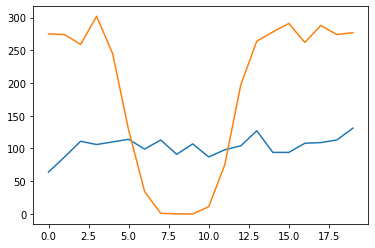

In [28]:
#plt.plot(hist[125])
plt.plot(hist[200][280:300])
plt.plot(hist[60][230:250])
print("Inner")
print(hist[200][280:300])
print("Outer")
print(hist[60][230:250])

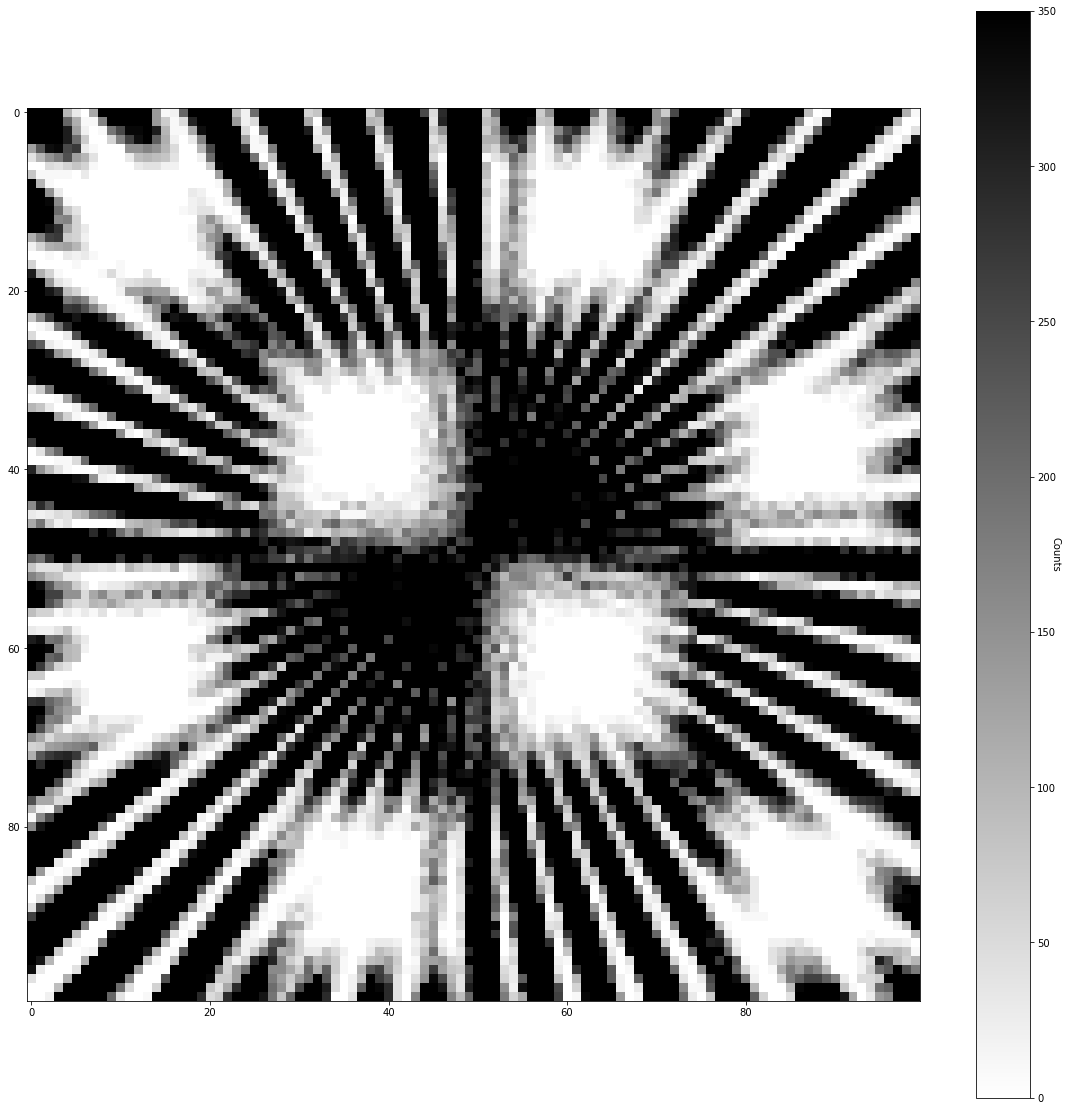

In [26]:

plt.figure(figsize=(20,20))
#plt.imshow(histtotal[50:250,100:300],cmap="hot")
plt.imshow(histtotal[100:200,150:250],cmap="binary",vmax = 350)
cbar = plt.colorbar()
cbar.set_label("Counts",rotation=270)
plt.show()
plt.close()

In [2]:
for i in range(10):
    os.system("mkdir Pavia"+str(i))

In [ ]:
content = os.listdir("Pavia9")
print(content)
for elem in content[1:]:
    title = "Pavia9/"+str(elem)
    with open(title, 'r') as file:
        position = np.array(eval(file.read()))
        file.close()
    print(title)

['Metadata.txt', 'Testrun-of-full-sim-AnglePhi-index0.txt', 'Testrun-of-full-sim-AnglePhi-index1.txt', 'Testrun-of-full-sim-AnglePhi-index2.txt', 'Testrun-of-full-sim-AnglePhi-index3.txt', 'Testrun-of-full-sim-AnglePhi-index4.txt', 'Testrun-of-full-sim-AnglePhi-index5.txt', 'Testrun-of-full-sim-AngleTheta-index0.txt', 'Testrun-of-full-sim-AngleTheta-index1.txt', 'Testrun-of-full-sim-AngleTheta-index2.txt', 'Testrun-of-full-sim-AngleTheta-index3.txt', 'Testrun-of-full-sim-AngleTheta-index4.txt', 'Testrun-of-full-sim-AngleTheta-index5.txt', 'Testrun-of-full-sim-positionXY-index0.txt', 'Testrun-of-full-sim-positionXY-index1.txt', 'Testrun-of-full-sim-positionXY-index2.txt', 'Testrun-of-full-sim-positionXY-index3.txt', 'Testrun-of-full-sim-positionXY-index4.txt', 'Testrun-of-full-sim-positionXY-index5.txt']
Pavia9/Testrun-of-full-sim-AnglePhi-index0.txt
Pavia9/Testrun-of-full-sim-AnglePhi-index1.txt
Pavia9/Testrun-of-full-sim-AnglePhi-index2.txt
Pavia9/Testrun-of-full-sim-AnglePhi-index3.t